# Multiple Linear Regression

## Step 1: Reading and Understanding the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
pd.options.display.float_format = '{:.2f}'.format

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
bikeshare = pd.read_csv('day.csv')
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [6]:
bikeshare.drop(['instant'],axis=1,inplace=True)

In [7]:
bikeshare.shape

(730, 15)

In [8]:
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [9]:
bikeshare.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Print number of unique values in all columns
bikeshare.nunique()

dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## Step 2: Visualising the Data

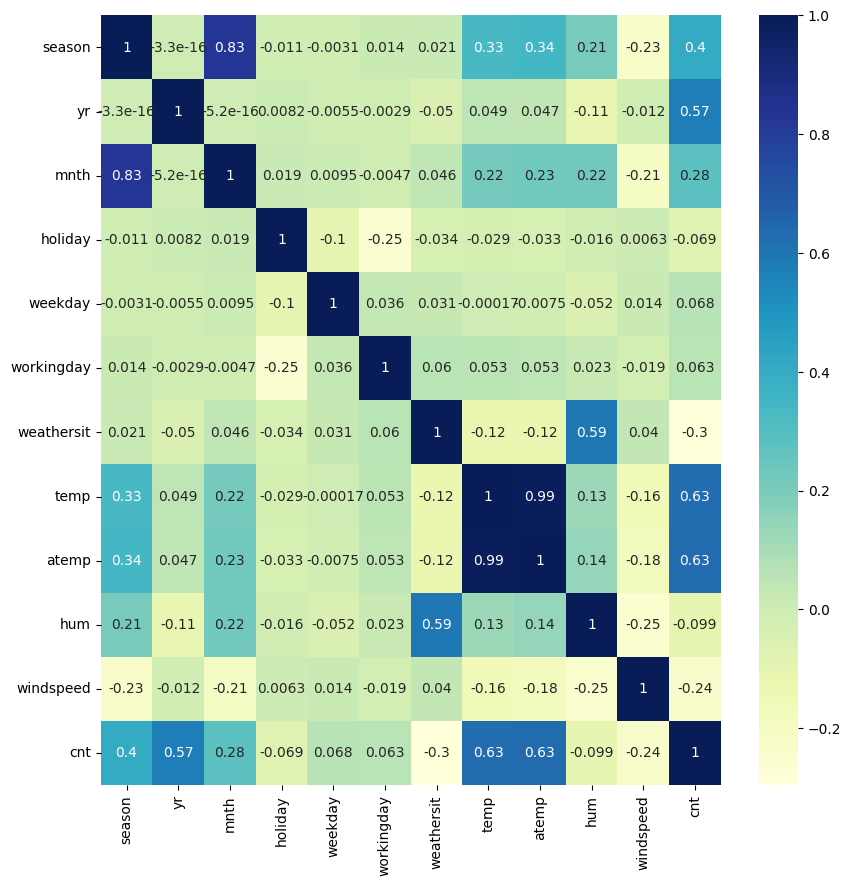

In [11]:
bikeshare_numeric = bikeshare.select_dtypes(include=[np.number])
bikeshare_numeric.drop(['casual','registered'],axis=1,inplace=True)
plt.figure(figsize=(10,10))
sns.heatmap(bikeshare_numeric.corr(), cmap="YlGnBu",annot = True)
plt.show()

<Figure size 1500x3000 with 0 Axes>

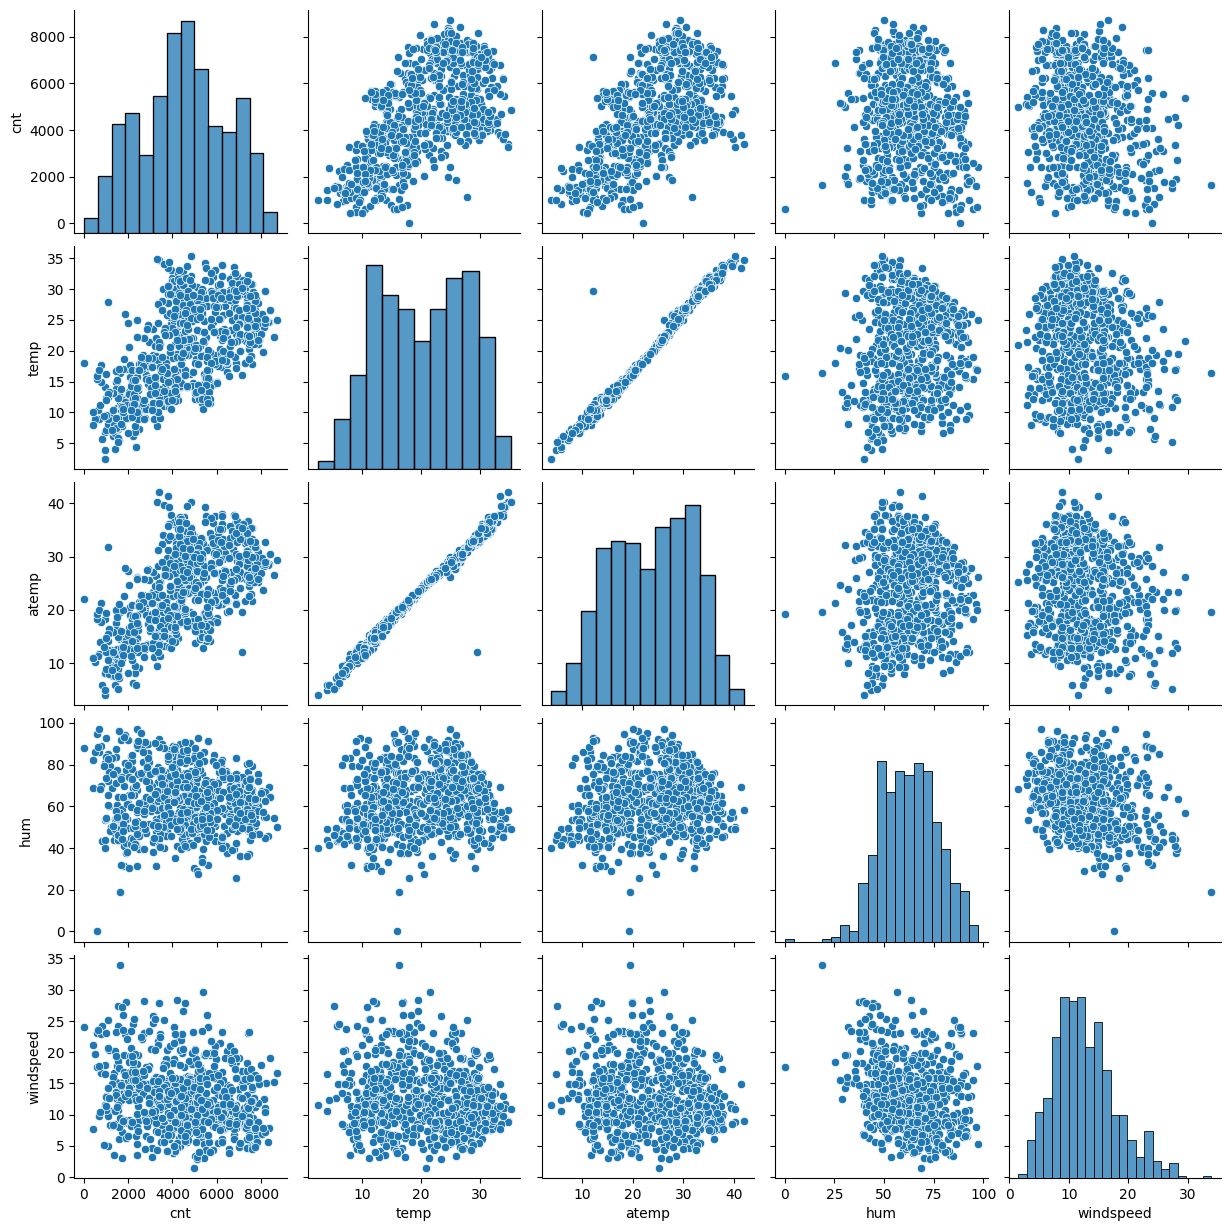

In [12]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeshare,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Catagorical variable

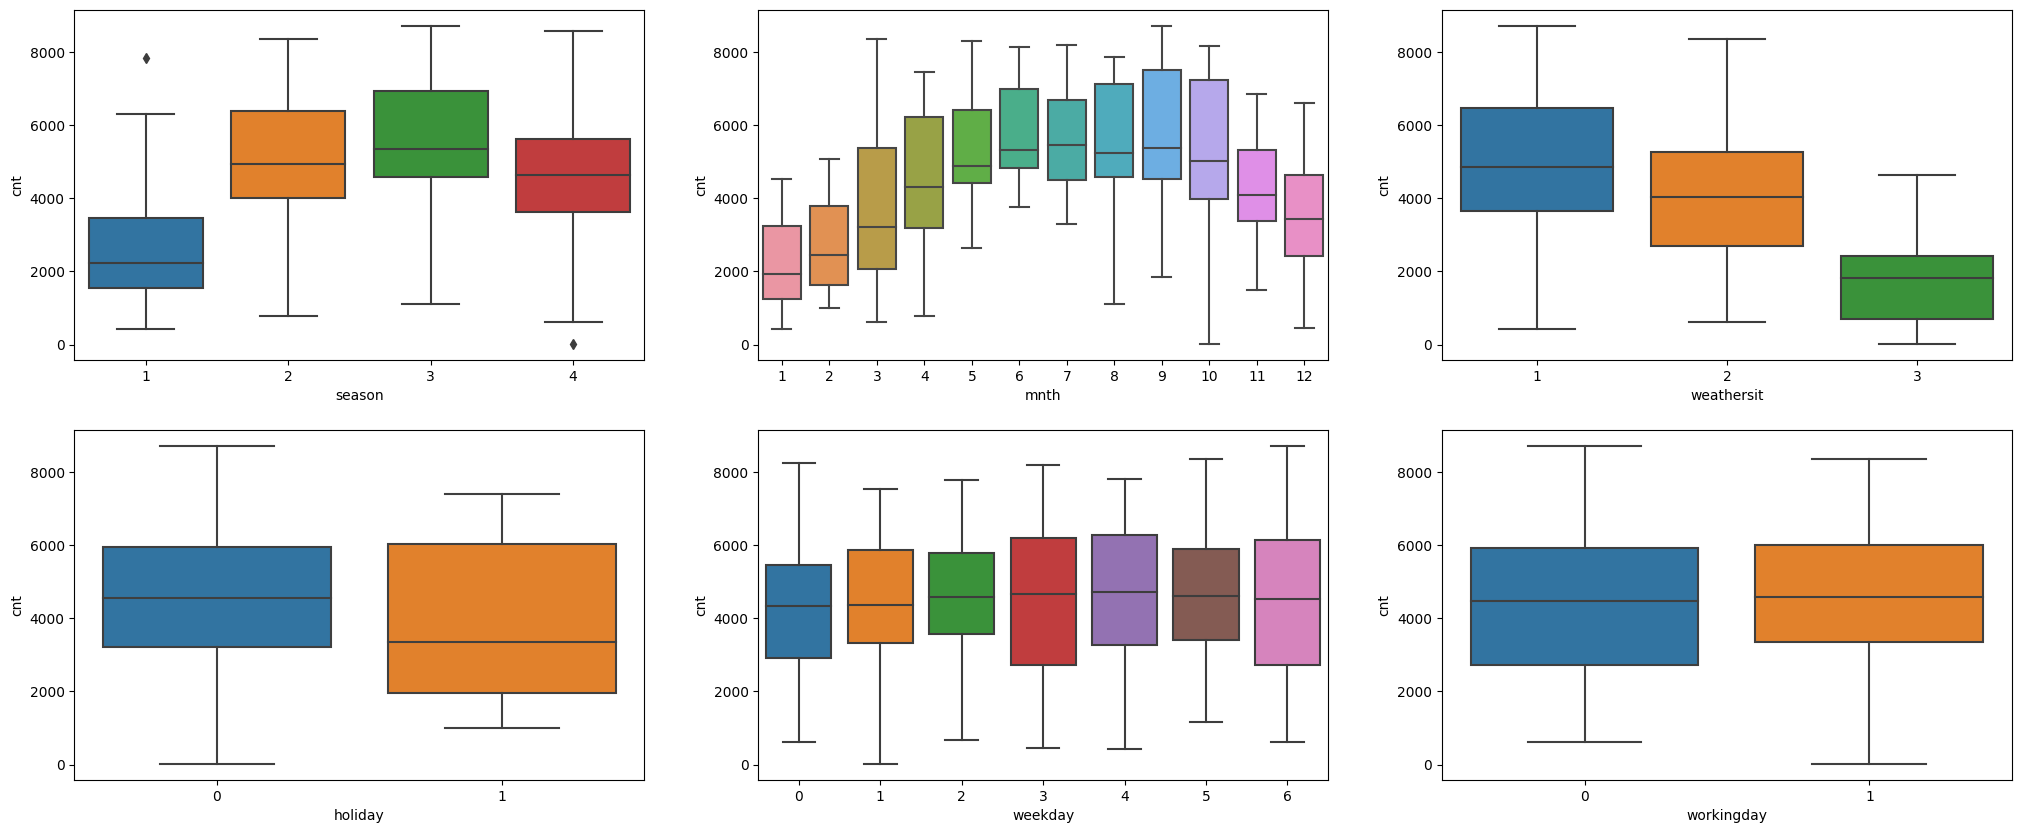

In [13]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeshare)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeshare)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeshare)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeshare)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeshare)
plt.show()

In [14]:
a = bikeshare.groupby(['workingday'])
a.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,06-01-2018,1,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,07-01-2018,1,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,08-01-2018,1,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,09-01-2018,1,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
14,15-01-2018,1,0,1,0,6,0,2,9.57,12.41,49.88,10.58,222,1026,1248


In [17]:
df_w = bikeshare[bikeshare['workingday'] == 1]
wd_1 = df_w['cnt'].sum()
total = bikeshare.groupby(['workingday'])['cnt'].sum().sum()#sum(bikeshare['cnt'])
print(wd_1/total)
print(df_w['cnt'].median())

0.6960449367867524
4585.0


In [18]:
df_season = bikeshare.groupby(['season'])['cnt'].sum()
print(df_season)
df_season = df_season.reset_index()
print(df_season)
print(df_season.loc[df_season['season'] == 3,'cnt'] / df_season.cnt.sum())
print(df_season.loc[df_season['season'] == 1,'cnt'] / df_season.cnt.sum())
print(df_season.loc[df_season['season'] == 2,'cnt'] / df_season.cnt.sum())
print(bikeshare.groupby(['season'])['cnt'].median())

season
1     469514
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64
   season      cnt
0       1   469514
1       2   918589
2       3  1061129
3       4   841613
2   0.32
Name: cnt, dtype: float64
0   0.14
Name: cnt, dtype: float64
1   0.28
Name: cnt, dtype: float64
season
1   2222.50
2   4941.50
3   5353.50
4   4634.50
Name: cnt, dtype: float64


In [19]:
df_wet = bikeshare.groupby(['weathersit'])['cnt'].sum()
print(df_wet)
df_wet = df_wet.reset_index()
print(df_wet.loc[df_wet['weathersit'] == 3,'cnt'] / df_wet.cnt.sum())
print(df_wet.loc[df_wet['weathersit'] == 1,'cnt'] / df_wet.cnt.sum())
print(df_wet.loc[df_wet['weathersit'] == 2,'cnt'] / df_wet.cnt.sum())
print(bikeshare.groupby(['weathersit'])['cnt'].median())

weathersit
1    2257952
2     995024
3      37869
Name: cnt, dtype: int64
2   0.01
Name: cnt, dtype: float64
0   0.69
Name: cnt, dtype: float64
1   0.30
Name: cnt, dtype: float64
weathersit
1   4844.00
2   4043.00
3   1817.00
Name: cnt, dtype: float64


In [20]:
print(bikeshare.groupby(['holiday'])['cnt'].sum() / bikeshare.cnt.sum())
print(bikeshare.groupby(['weathersit'])['cnt'].median())

holiday
0   0.98
1   0.02
Name: cnt, dtype: float64
weathersit
1   4844.00
2   4043.00
3   1817.00
Name: cnt, dtype: float64


In [21]:
print(bikeshare.groupby(['weekday'])['cnt'].sum() / bikeshare.cnt.sum())
print(bikeshare.groupby(['weekday'])['cnt'].median())

weekday
0   0.13
1   0.14
2   0.14
3   0.14
4   0.15
5   0.15
6   0.15
Name: cnt, dtype: float64
weekday
0   4334.00
1   4359.00
2   4576.50
3   4656.00
4   4721.00
5   4601.50
6   4521.00
Name: cnt, dtype: float64


In [22]:
print(bikeshare.groupby(['workingday'])['cnt'].sum() / bikeshare.cnt.sum())
print(bikeshare.groupby(['workingday'])['cnt'].median())

workingday
0   0.30
1   0.70
Name: cnt, dtype: float64
workingday
0   4459.00
1   4585.00
Name: cnt, dtype: float64


## Insights
seasons, month, weathersit, working day, holiday, weekday are catagorical variables<br>
Insights
There were 6 categorical variables in the dataset.

I used Box plot to study their effect on the dependent variable (‘cnt’) from Independent catagorical variables.

The inference that i could derive are:

**season**: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

**mnth**: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

**weathersit**: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.


**holiday:** Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

**weekday:** weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

**workingday:** Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

## Step 3: Data Preparation

In [23]:
bike_new=bikeshare[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

### Creating Dummy Variables
Before creating dummy variables, we will have to convert them into 'category' data types.

In [24]:
bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [25]:
pd.get_dummies(bike_new['season'])

,1,2,3,4
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
725,True,False,False,False
726,True,False,False,False
727,True,False,False,False
728,True,False,False,False


In [26]:
bike_new = pd.get_dummies(bike_new,drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

## Step 4: Splitting the Data into Training and Testing Sets

!pip install sklearn <br>
!pip install -U scikit-learn scipy matplotlib

In [27]:
bike_new.shape

(730, 30)

In [28]:
from sklearn.model_selection import train_test_split
np.random.seed(0)#control the randomness everytime
df_train, df_test = train_test_split(bike_new,train_size=0.70, test_size=0.30,random_state=100)#random state gives same split data

In [29]:
df_train.shape

(510, 30)

In [30]:
df_test.shape

(219, 30)

### Rescaling the Features

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars]

,temp,atemp,hum,windspeed,cnt
653,0.51,0.50,0.58,0.30,0.86
576,0.82,0.77,0.73,0.26,0.83
426,0.44,0.44,0.64,0.26,0.47
728,0.25,0.20,0.50,0.66,0.20
482,0.40,0.39,0.50,0.19,0.48
...,...,...,...,...,...
526,0.82,0.76,0.61,0.36,0.76
578,0.86,0.82,0.68,0.19,0.83
53,0.20,0.22,0.44,0.11,0.22
350,0.25,0.22,0.58,0.43,0.31


In [32]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.51,0.50,0.58,0.30,0.86,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
576,1,0,1,0.82,0.77,0.73,0.26,0.83,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
426,1,0,0,0.44,0.44,0.64,0.26,0.47,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
728,1,0,0,0.25,0.20,0.50,0.66,0.20,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
482,1,0,0,0.40,0.39,0.50,0.19,0.48,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


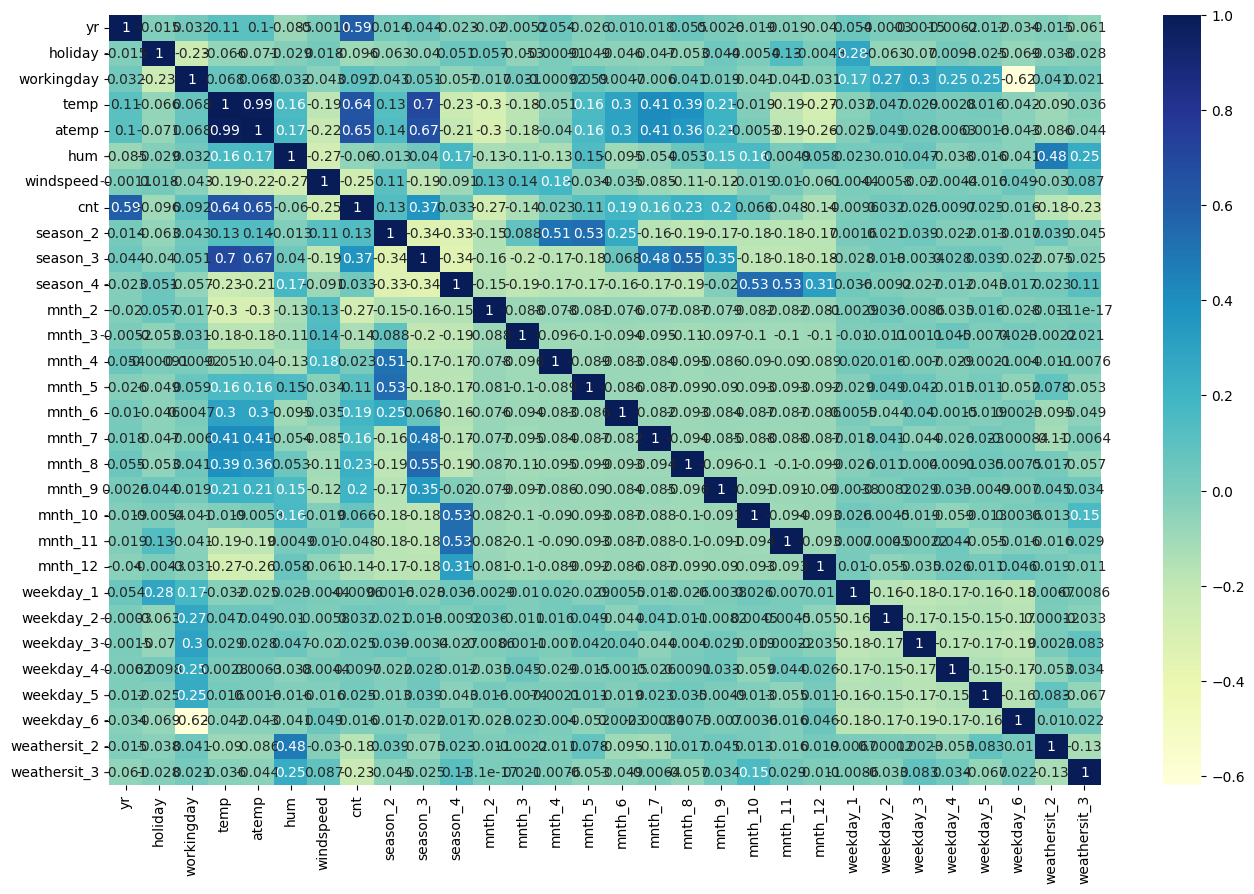

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 5: Building a linear model using rfe and automated approach

### Use RFE to eliminate some columns

In [34]:
y_train = df_train.pop('cnt')
X_train = df_train

In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
rfe = RFE(lr)#,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression())

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 8),
 ('mnth_3', False, 3),
 ('mnth_4', False, 5),
 ('mnth_5', False, 4),
 ('mnth_6', False, 6),
 ('mnth_7', False, 9),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 10),
 ('mnth_12', False, 11),
 ('weekday_1', False, 12),
 ('weekday_2', False, 13),
 ('weekday_3', False, 15),
 ('weekday_4', False, 16),
 ('weekday_5', False, 14),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

### VIF check

!pip install statsmodels

In [40]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
bool_columns = X_train_rfe.select_dtypes(include=['bool'])
X_train_rfe[bool_columns.columns]

,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,False,True,False,False,True,False,False,False
576,False,False,False,False,False,False,False,False
426,False,False,False,False,False,True,True,False
728,False,False,False,False,False,False,False,False
482,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...
526,True,False,False,False,False,False,True,False
578,False,False,True,False,False,False,False,False
53,False,False,False,False,False,False,False,False
350,False,True,False,False,False,True,True,False


In [42]:
bool_columns.columns 

Index(['season_2', 'season_4', 'mnth_8', 'mnth_9', 'mnth_10', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [43]:
# Applying the function to the housing list
def binary_map(x):
    return x.map({True: 1, False: 0})
X_train_rfe[bool_columns.columns] = X_train_rfe[bool_columns.columns].apply(binary_map)
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.51,0.58,0.30,0,1,0,0,1,0,0,0
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,0,0,0,0,0,1,1,0
728,1,0,0,0.25,0.50,0.66,0,0,0,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.82,0.61,0.36,1,0,0,0,0,0,1,0
578,1,0,1,0.86,0.68,0.19,0,0,1,0,0,0,0,0
53,0,0,1,0.20,0.44,0.11,0,0,0,0,0,0,0,0
350,0,0,0,0.25,0.58,0.43,0,1,0,0,0,1,1,0


In [44]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   season_2      510 non-null    int64  
 7   season_4      510 non-null    int64  
 8   mnth_8        510 non-null    int64  
 9   mnth_9        510 non-null    int64  
 10  mnth_10       510 non-null    int64  
 11  weekday_6     510 non-null    int64  
 12  weathersit_2  510 non-null    int64  
 13  weathersit_3  510 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 59.8 KB


In [45]:
X_train_rfe.head()

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
653,1,0,1,0.51,0.58,0.30,0,1,0,0,1,0,0,0
576,1,0,1,0.82,0.73,0.26,0,0,0,0,0,0,0,0
426,1,0,0,0.44,0.64,0.26,0,0,0,0,0,1,1,0
728,1,0,0,0.25,0.50,0.66,0,0,0,0,0,0,0,0
482,1,0,0,0.40,0.50,0.19,1,0,0,0,0,1,1,0


In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.59
3,temp,10.01
2,workingday,5.05
5,windspeed,3.82
7,season_4,2.27
12,weathersit_2,2.14
0,yr,2.03
11,weekday_6,1.90
6,season_2,1.83
10,mnth_10,1.62


#### VIF shows how independent values are correlated with each other

## Building Linear Model using 'STATS MODEL'

In [47]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const           0.19
yr              0.23
holiday        -0.06
workingday      0.04
temp            0.53
hum            -0.17
windspeed      -0.19
season_2        0.10
season_4        0.13
mnth_8          0.06
mnth_9          0.13
mnth_10         0.04
weekday_6       0.05
weathersit_2   -0.06
weathersit_3   -0.25
dtype: float64

In [48]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     197.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          3.24e-192
Time:                        21:28:05   Log-Likelihood:                 519.16
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     495   BIC:                            -944.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1945      0.029      6.770      0.000       0.138       0.251
yr               0.2292      0.008     28.743      0.000       0.213       0.245
holiday         -0.0558      0.027     -2.078      0.038      -0.109      -0.003
workingday       0.0444      0.012      3.850      0.000       0.022       0.067
temp             0.5301      0.022     24.136      0.000       0.487       0.573
hum             -0.1692      0.037     -4.580      0.000      -0.242      -0.097
windspeed       -0.1857      0.025     -7.359      0.000      -0.235      -0.136
season_2         0.1039      0.011      9.680      0.000       0.083       0.125
season_4         0.1348      0.012     11.316      0.000       0.111       0.158
mnth_8           0.0560      0.016      3.478      0.001       0.024       0.088
mnth_9           0.1255      0.016      7.783      0.000       0.094       0.157
mnth_10          0.0411      0.017      2.403      0.017       0.007       0.075
weekday_6        0.0529      0.015      3.647      0.000       0.024       0.081
weathersit_2    -0.0582      0.010     -5.618      0.000      -0.079      -0.038
weathersit_3    -0.2486      0.026     -9.559      0.000      -0.300      -0.197
==============================================================================
Omnibus:                       71.668   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.034
Skew:                          -0.713   Prob(JB):                     2.96e-40
Kurtosis:                       5.555   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### All the columns have p-value > .05 

In [49]:
#drop 'hum' with high vif
vif = pd.DataFrame()
X_train_rfe.drop(['hum'],axis = 1, inplace=True)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.38
2,workingday,4.39
4,windspeed,3.60
0,yr,2.02
6,season_4,2.02
5,season_2,1.82
10,weekday_6,1.77
9,mnth_10,1.62
7,mnth_8,1.59
11,weathersit_2,1.54


In [50]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     202.9
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          6.16e-189
Time:                        21:28:06   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -989.1
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0945      0.019      4.961      0.000       0.057       0.132
yr               0.2329      0.008     28.799      0.000       0.217       0.249
holiday         -0.0543      0.027     -1.982      0.048      -0.108      -0.000
workingday       0.0475      0.012      4.045      0.000       0.024       0.070
temp             0.5099      0.022     23.236      0.000       0.467       0.553
windspeed       -0.1532      0.025     -6.203      0.000      -0.202      -0.105
season_2         0.1008      0.011      9.226      0.000       0.079       0.122
season_4         0.1267      0.012     10.544      0.000       0.103       0.150
mnth_8           0.0542      0.016      3.305      0.001       0.022       0.086
mnth_9           0.1189      0.016      7.259      0.000       0.087       0.151
mnth_10          0.0371      0.017      2.132      0.033       0.003       0.071
weekday_6        0.0580      0.015      3.931      0.000       0.029       0.087
weathersit_2    -0.0854      0.009     -9.839      0.000      -0.102      -0.068
weathersit_3    -0.2942      0.025    -12.009      0.000      -0.342      -0.246
==============================================================================
Omnibus:                       70.507   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.937
Skew:                          -0.704   Prob(JB):                     2.30e-39
Kurtosis:                       5.528   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
#drop 'hum' with high vif
vif = pd.DataFrame()
X_train_rfe.drop(['windspeed'],axis = 1, inplace=True)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.05
2,workingday,3.88
5,season_4,2.01
0,yr,1.99
4,season_2,1.80
8,mnth_10,1.61
9,weekday_6,1.60
6,mnth_8,1.57
10,weathersit_2,1.53
7,mnth_9,1.32


##### let  us drop temp as it has high VIF and it can be explained by season

In [52]:
#drop 'hum' with high vif
vif = pd.DataFrame()
X_train_rfe.drop(['temp'],axis = 1, inplace=True)
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,2.61
4,season_4,2.01
0,yr,1.84
7,mnth_10,1.57
3,season_2,1.54
9,weathersit_2,1.53
8,weekday_6,1.34
5,mnth_8,1.23
6,mnth_9,1.16
10,weathersit_3,1.09


In [53]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_lm).fit()

In [54]:
lr.params

const           0.28
yr              0.25
holiday        -0.09
workingday      0.05
season_2        0.16
season_4        0.09
mnth_8          0.24
mnth_9          0.26
mnth_10         0.11
weekday_6       0.04
weathersit_2   -0.12
weathersit_3   -0.33
dtype: float64

In [55]:
# Assuming lr.params contains the coefficients
intercept = lr.params['const']
coefficients = lr.params.drop('const')  # Drop the intercept coefficient

# Get the names of the predictor variables
predictor_variables = coefficients.index

# Create the equation string
equation = f'y = {intercept}'
for i, predictor in enumerate(predictor_variables):
    equation += f' + {coefficients[i]} * {predictor}'

# Print the equation
print(equation)

y = 0.28014141544160015 + 0.24909501169318032 * yr + -0.08615777558600825 * holiday + 0.0499196657946793 * workingday + 0.1641382934110598 * season_2 + 0.09412473717026 * season_4 + 0.24073040848880908 * mnth_8 + 0.2642725125589535 * mnth_9 + 0.11221077031007466 * mnth_10 + 0.0449271290000577 * weekday_6 + -0.11516256007645619 * weathersit_2 + -0.33193877211042805 * weathersit_3


In [56]:
X_train_lm.shape

(510, 12)

In [57]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   holiday       510 non-null    int64  
 3   workingday    510 non-null    int64  
 4   season_2      510 non-null    int64  
 5   season_4      510 non-null    int64  
 6   mnth_8        510 non-null    int64  
 7   mnth_9        510 non-null    int64  
 8   mnth_10       510 non-null    int64  
 9   weekday_6     510 non-null    int64  
 10  weathersit_2  510 non-null    int64  
 11  weathersit_3  510 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 51.8 KB


In [58]:
y_train.shape

(510,)

In [59]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 510 entries, 653 to 79
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
510 non-null    float64
dtypes: float64(1)
memory usage: 8.0 KB


In [60]:
lr.params

const           0.28
yr              0.25
holiday        -0.09
workingday      0.05
season_2        0.16
season_4        0.09
mnth_8          0.24
mnth_9          0.26
mnth_10         0.11
weekday_6       0.04
weathersit_2   -0.12
weathersit_3   -0.33
dtype: float64

In [61]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     79.00
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          1.02e-101
Time:                        21:28:10   Log-Likelihood:                 296.00
No. Observations:                 510   AIC:                            -568.0
Df Residuals:                     498   BIC:                            -517.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2801      0.019     14.635      0.000       0.243       0.318
yr               0.2491      0.012     20.428      0.000       0.225       0.273
holiday         -0.0862      0.041     -2.079      0.038      -0.168      -0.005
workingday       0.0499      0.018      2.811      0.005       0.015       0.085
season_2         0.1641      0.016     10.279      0.000       0.133       0.196
season_4         0.0941      0.018      5.272      0.000       0.059       0.129
mnth_8           0.2407      0.022     10.865      0.000       0.197       0.284
mnth_9           0.2643      0.023     11.379      0.000       0.219       0.310
mnth_10          0.1122      0.026      4.335      0.000       0.061       0.163
weekday_6        0.0449      0.022      2.012      0.045       0.001       0.089
weathersit_2    -0.1152      0.013     -8.870      0.000      -0.141      -0.090
weathersit_3    -0.3319      0.037     -8.993      0.000      -0.404      -0.259
==============================================================================
Omnibus:                        8.798   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               14.075
Skew:                          -0.043   Prob(JB):                     0.000879
Kurtosis:                       3.809   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like

In [62]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            510 non-null    int64
 1   holiday       510 non-null    int64
 2   workingday    510 non-null    int64
 3   season_2      510 non-null    int64
 4   season_4      510 non-null    int64
 5   mnth_8        510 non-null    int64
 6   mnth_9        510 non-null    int64
 7   mnth_10       510 non-null    int64
 8   weekday_6     510 non-null    int64
 9   weathersit_2  510 non-null    int64
 10  weathersit_3  510 non-null    int64
dtypes: int64(11)
memory usage: 47.8 KB


In [63]:
### Both VIF and p-value are in acceptable range
y_train_cnt = lr.predict(X_train_lm)

In [64]:
X_train_lm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         510 non-null    float64
 1   yr            510 non-null    int64  
 2   holiday       510 non-null    int64  
 3   workingday    510 non-null    int64  
 4   season_2      510 non-null    int64  
 5   season_4      510 non-null    int64  
 6   mnth_8        510 non-null    int64  
 7   mnth_9        510 non-null    int64  
 8   mnth_10       510 non-null    int64  
 9   weekday_6     510 non-null    int64  
 10  weathersit_2  510 non-null    int64  
 11  weathersit_3  510 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 51.8 KB


Text(0.5, 0, 'Errors')

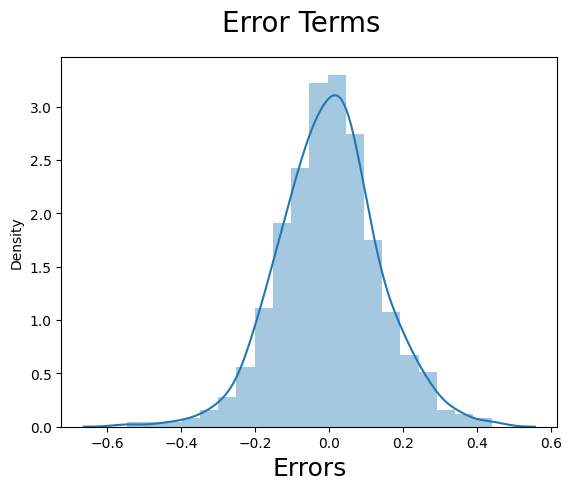

In [65]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

## Step 8: Making Predictions Using the Final Model

In [66]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [67]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.00,219.00,219.00,219.00,219.00,219.00,219.00,219.00
mean,0.48,0.04,0.70,0.56,0.53,0.64,0.31,0.52
std,0.50,0.19,0.46,0.23,0.22,0.15,0.16,0.22
min,0.00,0.00,0.00,0.05,0.03,0.26,-0.04,0.05
25%,0.00,0.00,0.00,0.35,0.34,0.53,0.20,0.38
50%,0.00,0.00,1.00,0.56,0.55,0.63,0.30,0.52
75%,1.00,0.00,1.00,0.76,0.71,0.74,0.40,0.67
max,1.00,1.00,1.00,0.98,0.98,1.00,0.81,0.96


In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [69]:
X_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            510 non-null    int64
 1   holiday       510 non-null    int64
 2   workingday    510 non-null    int64
 3   season_2      510 non-null    int64
 4   season_4      510 non-null    int64
 5   mnth_8        510 non-null    int64
 6   mnth_9        510 non-null    int64
 7   mnth_10       510 non-null    int64
 8   weekday_6     510 non-null    int64
 9   weathersit_2  510 non-null    int64
 10  weathersit_3  510 non-null    int64
dtypes: int64(11)
memory usage: 47.8 KB


In [70]:
# Create a list of columns to drop from X_test
columns_to_drop = [col for col in X_test.columns if col not in X_train_rfe.columns]
columns_to_drop

['temp',
 'atemp',
 'hum',
 'windspeed',
 'season_3',
 'mnth_2',
 'mnth_3',
 'mnth_4',
 'mnth_5',
 'mnth_6',
 'mnth_7',
 'mnth_11',
 'mnth_12',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5']

In [71]:
# Drop the selected columns from X_test
X_test_1 = X_test.drop(columns=columns_to_drop)

In [72]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            219 non-null    int64
 1   holiday       219 non-null    int64
 2   workingday    219 non-null    int64
 3   season_2      219 non-null    bool 
 4   season_4      219 non-null    bool 
 5   mnth_8        219 non-null    bool 
 6   mnth_9        219 non-null    bool 
 7   mnth_10       219 non-null    bool 
 8   weekday_6     219 non-null    bool 
 9   weathersit_2  219 non-null    bool 
 10  weathersit_3  219 non-null    bool 
dtypes: bool(8), int64(3)
memory usage: 8.6 KB


In [73]:
bool_columns = X_test_1.select_dtypes(include=['bool'])
def map_bool(col):
    return col.map({True:1,False:0})
X_test_1[bool_columns.columns] =  X_test_1[bool_columns.columns].apply(map_bool)

In [74]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   yr            219 non-null    int64
 1   holiday       219 non-null    int64
 2   workingday    219 non-null    int64
 3   season_2      219 non-null    int64
 4   season_4      219 non-null    int64
 5   mnth_8        219 non-null    int64
 6   mnth_9        219 non-null    int64
 7   mnth_10       219 non-null    int64
 8   weekday_6     219 non-null    int64
 9   weathersit_2  219 non-null    int64
 10  weathersit_3  219 non-null    int64
dtypes: int64(11)
memory usage: 20.5 KB


In [75]:
X_test_1 = sm.add_constant(X_test_1)

In [76]:
X_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   holiday       219 non-null    int64  
 3   workingday    219 non-null    int64  
 4   season_2      219 non-null    int64  
 5   season_4      219 non-null    int64  
 6   mnth_8        219 non-null    int64  
 7   mnth_9        219 non-null    int64  
 8   mnth_10       219 non-null    int64  
 9   weekday_6     219 non-null    int64  
 10  weathersit_2  219 non-null    int64  
 11  weathersit_3  219 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 22.2 KB


In [77]:
X_test_1.head()

,const,yr,holiday,workingday,season_2,season_4,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
184,1.00,0,1,0,0,0,0,0,0,0,1,0
535,1.00,1,0,1,1,0,0,0,0,0,0,0
299,1.00,0,0,1,0,1,0,0,1,0,1,0
221,1.00,0,0,1,0,0,1,0,0,0,0,0
152,1.00,0,0,1,1,0,0,0,0,0,0,0


In [78]:
# Making predictions using the fourth model
y_pred_m4 = lr.predict(X_test_1)
#lr object should have data frame of same colums both test and train

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

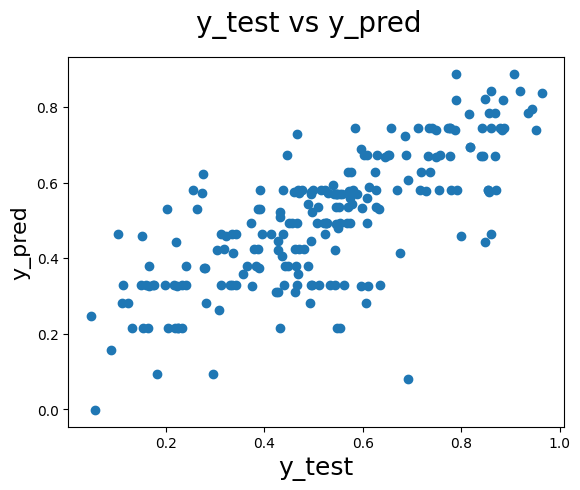

In [79]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [80]:
y_test.head()

184   0.69
535   0.71
299   0.30
221   0.55
152   0.57
Name: cnt, dtype: float64

In [81]:
y_pred_m4.head()

184   0.08
535   0.74
299   0.42
221   0.57
152   0.49
dtype: float64